In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置图像的显示位置，设置图像现在在当前的文档中
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # mac
# plt.rcParams['font.sans-serif'] = 'SimHei'  # window
plt.rcParams['axes.unicode_minus'] = False  # 设置负号


%config InlineBackend.figure_format = 'svg' #矢量图设置

字段说明
gender  性别
country  国籍
province  省份
city     城市
category  类别
fans   粉丝数
videos  视频数
likes  点赞数
comments  评论数
shares   分享数
school  学校
custom_verify  认证
signature  个性签名

In [39]:
# 加载数据
douyin = pd.read_csv("./douyin.csv")

In [53]:
douyin.head()

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
0,人民日报,0,中国,北京,北京,北京,政企,117259000,2427,1165446000,11906782048,9089061412,18,NaN,NaN,人民日报官方账号,参与、沟通、记录时代。
1,央视新闻,0,中国,北京,北京,北京,政企,105648000,3681,3814571666,2603872833,1989050522,27,NaN,央视新闻官方账号,央视新闻官方抖音号,本宝宝暂时还没想到个性签名
2,陈赫,1,中国,NaN,上海,上海,明星,68374000,422,570096000,430908721,117639297,131,上海戏剧学院,演员陈赫,NaN,😎帅到没朋友 💁🏻‍♂️有东西直播间 🔜1⃣️1⃣️1⃣️8⃣️🕔 ☑️公众号➰[陈赫]
3,Dear-迪丽热巴,0,NaN,NaN,NaN,NaN,明星,49790000,29,181167000,202448645,151645265,0,NaN,演员,NaN,NaN
4,毒舌电影,1,中国,广东,广州,广州,剧情,46355000,616,820393000,28026109,13005392,24,NaN,优质影视自媒体、抖音影评团成员,NaN,看电影， 可以改变人生。 商务邮：dsmovie@youhaoxi.cn ❤️ 日历预售...


In [6]:
douyin.head(20)

1     2592
2     2094
0      329
未知      10
Name: gender, dtype: int64

需求：
1. 查看大V账户的男女比例 
2. 看国外的主要网红来源有哪些国家
3. 看国内的网红主要分布的省份、城市
4. 看大V喜欢什么类别的视频
5. 大V的粉丝数的分布 主要的粉丝量是多少
6. 发布最多的视频的抖音账号是哪些?TOP10
7. 查看哪些大V获取的点赞数更多？ 
8. 查看点赞数量的分布
9. 查看评论、分享的分布
10. 查看大V的毕业院校主要是哪些

### 1.查看大V账户的男女比例

In [27]:
res = douyin['gender'].value_counts()[:2]
res = res.tolist()
res

[2592, 2094]

In [28]:
data1 = [['男',res[0]],['女',res[1]]]
data1

[['男', 2592], ['女', 2094]]

In [33]:
from pyecharts import options as opts
from pyecharts.charts import *


(
    Pie()
    .add(
        "",
        data1,
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        )
        
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="大V的男女比例"))
    .render_notebook()
)

## 2. 看国外的主要网红来源有哪些国家

In [48]:
douyin['country'].unique()

array(['中国', nan, '香港', '暂不设置', '阿尔及利亚', '奥地利', '百慕大', '美国', '阿拉伯联合酋长国',
       '尼泊尔', '爱沙尼亚', '斯里兰卡', '英国', '埃塞俄比亚', '韩国', '埃及', '法国', '阿尔巴尼亚',
       '澳大利亚', '安道尔', '瑞士', '日本', '泰国', '爱尔兰', '俄罗斯', '加拿大', '巴巴多斯岛',
       '汤加', '阿鲁巴', '西班牙', '挪威', '冰岛', '阿曼', '约旦', '安哥拉', '玻利维亚', '巴哈马',
       '苏丹', '直布罗陀'], dtype=object)

In [43]:
dic = {
    'China':'中国',
    'Hong Kong':'香港',
    '大韩民国':'韩国',
    'United States':'美国'
}

In [47]:
douyin['country'] = douyin['country'].replace(dic)

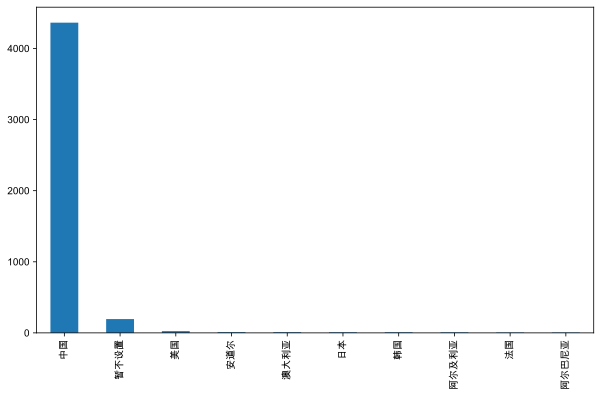

In [52]:
res = douyin['country'].value_counts()
res[:10].plot.bar(figsize=(10,6))
plt.show()

## 3.看国内的网红主要分布的省份、城市

In [54]:
douyin.columns

Index(['name', 'gender', 'country', 'province', 'city', 'location', 'category',
       'fans', 'videos', 'likes', 'comments', 'shares', 'following', 'school',
       'custom_verify', 'enterprise_verify', 'signature'],
      dtype='object')

In [79]:
res = douyin[douyin['country']=='中国']
res['province'].unique()

array(['北京', nan, '广东', '云南', '上海', '江苏', '吉林', '湖南', '四川', '黑龙江', '安徽',
       '山东', '浙江', '贵州', '辽宁', '新疆', '江西', '重庆', '湖北', '河南', '福建', '广西',
       '山西', '陕西', '天津', '河北', '青海', '海南', '内蒙古', '台湾', '甘肃', '香港', '宁夏'],
      dtype=object)

In [67]:
dic = {
    '新疆维吾尔自治区':'新疆',
    'Sichuan':'四川',
    'Jilin':'吉林',
    'Hubei':'湖北',
    'Guangdong':'广东',
    'Shaanxi':'陕西',
    '内蒙古自治区':'内蒙古',
    '广西壮族自治区':'广西'
}

In [68]:
douyin['province'].replace(dic,inplace=True)

In [61]:
douyin['province'] = douyin['province'].str.rstrip("省")

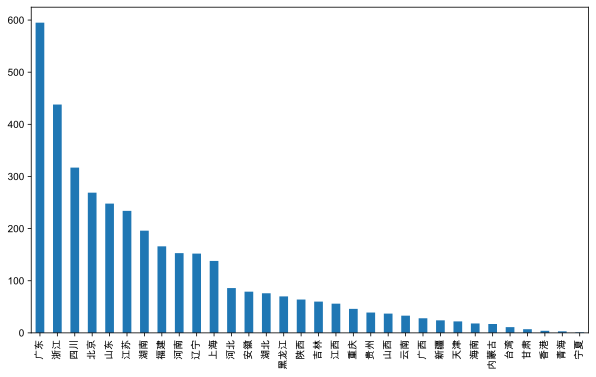

In [71]:
res['province'].value_counts().plot.bar(figsize=(10,6))

In [74]:
res.loc[:,'city'] = res['city'].str.rstrip('市')

/Users/apple/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [81]:
res['city'].unique()

array(['北京', '上海', '广州', '昆明', '苏州', '延边', '岳阳市', '绵阳', '哈尔滨', '六安',
       '重庆市', '威海', '杭州', '贵阳', '南京', '邵阳', '杭州市', '鞍山', '乌鲁木齐', '天津',
       '成都市', '沈阳', '金华', '萍乡', '成都', '韶关', '北京市', '徐州', '长沙', '青岛',
       '上海市', '深圳', '青岛市', '重庆', '武汉', '郑州', '天津市', '厦门', '贺州', '太原',
       '自贡', '武汉市', '黑河', '四平', '芜湖', '西安', '福州', '镇江', '安阳', '常州市', '长春',
       '广州市', '阿坝', '潜江', '东莞', '长沙市', '石家庄', '大连', '丽江', '怀化', '营口',
       '香港', '南通', '哈尔滨市', '烟台', '宜宾', '绍兴', '运城', '商丘', '佛山', '鄂州', '宿迁',
       '郴州', '深圳市', '聊城', '南阳市', '九江', '随州', '济南', '西宁', '无锡', '铜陵', '三亚',
       '桂林市', '广安', '六盘水', '郑州市', '合肥', '福州市', '丽水', '洛阳', '大连市', '日照',
       '合肥市', '朝阳', '泉州市', '抚顺', '保定', '伊春市', '信阳', '晋城', '厦门市', '石家庄市',
       '铜仁', '三明', '珠海', '泰州', '佳木斯', '铁岭', '安康', '廊坊', '乐山', '嘉兴', '秦皇岛',
       '温州市', '泸州市', '贺州市', '常德', '抚州', '宁波', '台北市', '泉州', '咸阳', '潍坊',
       '大理白族自治州', '惠州', '陇南', '永州', '衡水', '许昌市', '包头', '内江', '商丘市', '金华市',
       '苏州市', '淄博', '乐山市', '宜春', '莆田', '宣城', '呼和浩特', '东营市', 

In [76]:
dic1 = {
    'Shanghai':'上海',
    'Guangyuan':'广元',
    'Changchun':'长春',
    'Wuhan':'武汉',
    'Beijing':'北京',
    'Guangzhou':'广州',
    "Xi'an":'西安'
}

In [80]:
res['city'].replace(dic1,inplace=True)

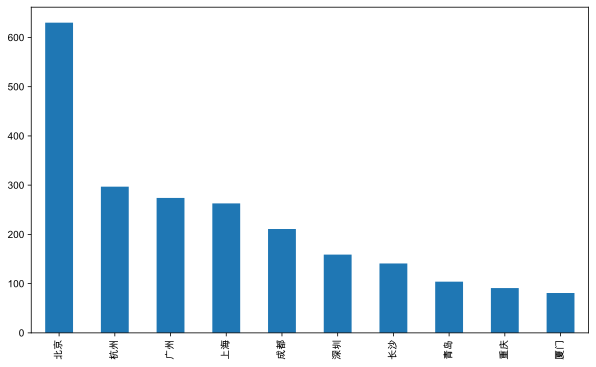

In [82]:
res['city'].value_counts()[:10].plot.bar(figsize=(10,6))
plt.show()

## 4.看大V喜欢什么类别的视频

In [83]:
douyin.columns

Index(['name', 'gender', 'country', 'province', 'city', 'location', 'category',
       'fans', 'videos', 'likes', 'comments', 'shares', 'following', 'school',
       'custom_verify', 'enterprise_verify', 'signature'],
      dtype='object')

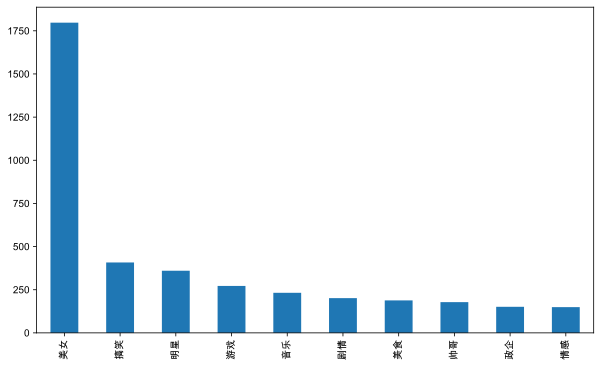

In [86]:
douyin['category'].value_counts()[:10].plot.bar(figsize=(10,6))

## 5.大V的粉丝数的分布 主要的粉丝量是多少

In [90]:
import seaborn as sns

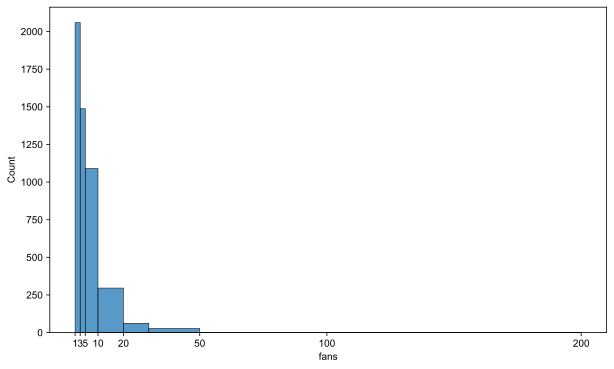

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(x=douyin['fans']/1e6,bins=[1,3,5,10,20,30,50,100,200])
plt.xticks([1,3,5,10,20,50,100,200])
plt.show()

## 6.发布最多的视频的抖音账号是哪些?TOP10

In [103]:
video = douyin.groupby('name')[['videos']].sum()

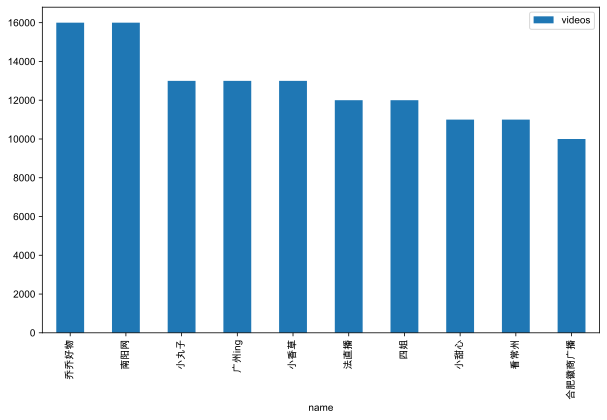

In [106]:
video.sort_values('videos',ascending=False,inplace=True)
video.iloc[:10].plot.bar(figsize=(10,6))
plt.show()

## 7.查看哪些大V获取的点赞数更多？

In [108]:
likes = douyin.groupby('name')['likes'].sum().sort_values(ascending=False)

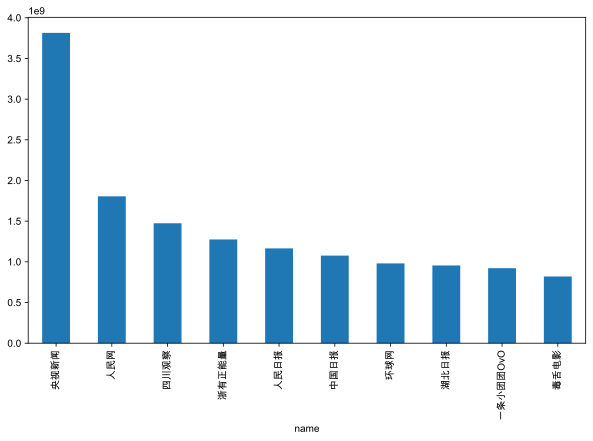

In [110]:
likes[:10].plot.bar(figsize=(10,6))
plt.show()

## 8.查看点赞数量的分布

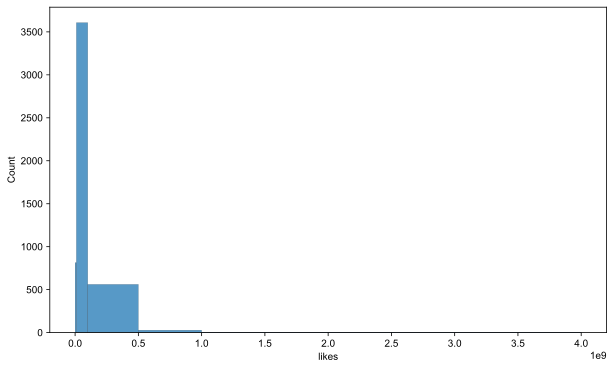

In [113]:
plt.figure(figsize=(10,6))
sns.histplot(x=likes,bins=[0,1e7,1e8,5e8,1e9,4e9])

In [ ]:
查看评论、分享的分布


## 10.查看大V的毕业院校主要是哪些

In [114]:
douyin.columns

Index(['name', 'gender', 'country', 'province', 'city', 'location', 'category',
       'fans', 'videos', 'likes', 'comments', 'shares', 'following', 'school',
       'custom_verify', 'enterprise_verify', 'signature'],
      dtype='object')

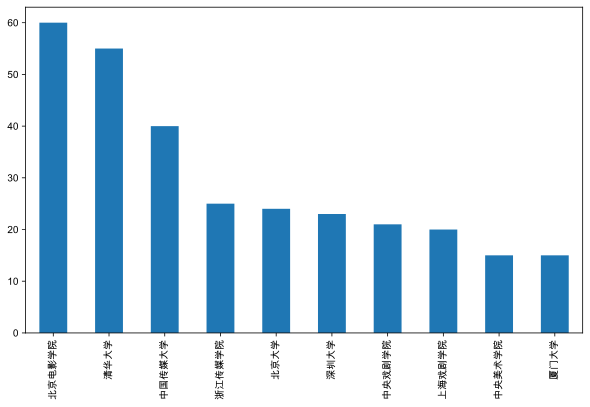

In [118]:
douyin[douyin['school']!='已毕业']['school'].value_counts()[:10].plot.bar(figsize=(10,6))